# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('C:/Users/willk/Downloads/world_development_indicators_indicators_data.parquet')
subset = df[df['country_name'] == 'United States']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7811291 entries, 0 to 7811290
Data columns (total 6 columns):
country_name      object
country_code      object
indicator_name    object
indicator_code    object
year              int64
value             float64
dtypes: float64(1), int64(1), object(4)
memory usage: 417.2+ MB


In [3]:
subset.groupby('indicator_name')['year'].count().sort_values()

indicator_name
2005 PPP conversion factor, GDP (LCU per international $)                                                                       1
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                                                     1
Ease of doing business index (1=most business-friendly regulations)                                                             1
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)                       1
Plant species (higher), threatened                                                                                              1
Bird species, threatened                                                                                                        1
Fish species, threatened                                                                                                        1
Battle-related deaths (number of people)                                   

In [4]:
to_plot = df[df['indicator_name'] == 'Primary education, duration (years)']
to_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12226 entries, 384 to 7810510
Data columns (total 6 columns):
country_name      12226 non-null object
country_code      12226 non-null object
indicator_name    12226 non-null object
indicator_code    12226 non-null object
year              12226 non-null int64
value             12226 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 668.6+ KB


In [5]:
import plotly_express as px

In [7]:
to_plot.head()

country_name country_code  \
384                          Uruguay          URY   
522   St. Vincent and the Grenadines          VCT   
1067                            Iraq          IRQ   
1246                       St. Lucia          LCA   
1980                      San Marino          SMR   

                           indicator_name indicator_code  year  value  
384   Primary education, duration (years)    SE.PRM.DURS  1989    6.0  
522   Primary education, duration (years)    SE.PRM.DURS  1975    7.0  
1067  Primary education, duration (years)    SE.PRM.DURS  1984    6.0  
1246  Primary education, duration (years)    SE.PRM.DURS  1977    7.0  
1980  Primary education, duration (years)    SE.PRM.DURS  1987    5.0

In [80]:
px.choropleth(to_plot[to_plot['year'].isin(range(2000, 2011))], title='Primary Education Duration',
              projection='robinson', color_continuous_scale=px.colors.sequential.Cividis,
              locations='country_code', color='value', animation_frame='year', animation_group='country_code')

In [83]:
to_plot.continent.unique()

array(['South America', 'Asia', 'Africa', 'North America', 'Europe',
       'Oceania'], dtype=object)

In [84]:
px.scatter(to_plot.query('continent == "Asia"'), x='year', y='value', title='Primary Education Duration in Asia')

In [85]:
df = df.merge(world[['continent', 'iso_a3', 'geometry']], left_on='country_code', right_on='iso_a3', how='left')
df = df.dropna(subset=['geometry'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5765960 entries, 1 to 7811290
Data columns (total 9 columns):
country_name      object
country_code      object
indicator_name    object
indicator_code    object
year              int64
value             float64
continent         object
iso_a3            object
geometry          object
dtypes: float64(1), int64(1), object(7)
memory usage: 439.9+ MB


In [87]:
# df = df.drop(columns=['iso_a3', 'indicator_code'])
df.drop(columns=['geometry']).to_parquet('C:/Users/willk/Downloads/world_development_indicators_data_clean.parquet')

In [94]:
df.columns

Index(['Unnamed: 0', 'country_name', 'country_code', 'year', 'continent',
       'Age dependency ratio (% of working-age population)',
       'Agricultural land (sq. km)',
       'Air transport, registered carrier departures worldwide',
       'Alternative and nuclear energy (% of total energy use)',
       'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'Electricity production from nuclear sources (% of total)',
       'Fixed telephone subscriptions (per 100 people)',
       'Food imports (% of merchandise imports)',
       'Fossil fuel energy consumption (% of total)',
       'Fuel imports (% of merchandise imports)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Government expenditure on education, total (% of GDP)',
       'Land area (sq. km)', 'Military expenditure (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mortality rate, infant (per 1,000 live births

In [99]:
px.choropleth(df, locations='country_code', color='Urban population (% of total)')

In [103]:
df.columns

Index(['Unnamed: 0', 'country_name', 'country_code', 'year', 'continent',
       'Age dependency ratio (% of working-age population)',
       'Agricultural land (sq. km)',
       'Air transport, registered carrier departures worldwide',
       'Alternative and nuclear energy (% of total energy use)',
       'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'Electricity production from nuclear sources (% of total)',
       'Fixed telephone subscriptions (per 100 people)',
       'Food imports (% of merchandise imports)',
       'Fossil fuel energy consumption (% of total)',
       'Fuel imports (% of merchandise imports)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Government expenditure on education, total (% of GDP)',
       'Land area (sq. km)', 'Military expenditure (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mortality rate, infant (per 1,000 live births

In [104]:
px.line(df.query('country_code == "USA"'), x='year', y='Military expenditure (% of GDP)')

In [106]:
px.line(df.query('continent == "North America"'), color='country_code', x='year', y='Military expenditure (% of GDP)')

In [107]:
px.line(df, color='country_code', x='year', y='Military expenditure (% of GDP)', facet_row='continent')

In [108]:
df.columns

Index(['Unnamed: 0', 'country_name', 'country_code', 'year', 'continent',
       'Age dependency ratio (% of working-age population)',
       'Agricultural land (sq. km)',
       'Air transport, registered carrier departures worldwide',
       'Alternative and nuclear energy (% of total energy use)',
       'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'Electricity production from nuclear sources (% of total)',
       'Fixed telephone subscriptions (per 100 people)',
       'Food imports (% of merchandise imports)',
       'Fossil fuel energy consumption (% of total)',
       'Fuel imports (% of merchandise imports)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Government expenditure on education, total (% of GDP)',
       'Land area (sq. km)', 'Military expenditure (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mortality rate, infant (per 1,000 live births

In [115]:
px.violin(df.query('year == 2010'),
                    y='GDP per capita (current US$)', animation_frame='year', 
          animation_group='country_code')

In [119]:
df.columns

Index(['Unnamed: 0', 'country_name', 'country_code', 'year', 'continent',
       'Age dependency ratio (% of working-age population)',
       'Agricultural land (sq. km)',
       'Air transport, registered carrier departures worldwide',
       'Alternative and nuclear energy (% of total energy use)',
       'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'Electricity production from nuclear sources (% of total)',
       'Fixed telephone subscriptions (per 100 people)',
       'Food imports (% of merchandise imports)',
       'Fossil fuel energy consumption (% of total)',
       'Fuel imports (% of merchandise imports)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Government expenditure on education, total (% of GDP)',
       'Land area (sq. km)', 'Military expenditure (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mortality rate, infant (per 1,000 live births

In [122]:
px.scatter(df.query('year == 2016'), x = 'GDP per capita (current US$)', y='Fixed telephone subscriptions (per 100 people)')

In [125]:
px.scatter(df.query('year == 2016'), x = 'GDP per capita (current US$)', y='Urban population (% of total)',
          hover_name='country_name', title='Urban Population vs GDP')

In [126]:
fe = pd.read_csv('../../sample_fishing_effort.csv', parse_dates=['date'])
fe.head()

date  lat_bin  lon_bin flag  geartype  vessel_hours  fishing_hours  \
0 2012-02-20    -5376    -6191  ARG  trawlers      3.072083       0.000000   
1 2012-02-20    -5375    -6219  ARG  trawlers      2.298889       0.000000   
2 2012-02-20    -4863    -6517  ARG  trawlers      3.758194       3.758194   
3 2012-02-20    -4863    -6474  ARG  trawlers      0.775139       0.000000   
4 2012-02-20    -4863    -6475  ARG  trawlers      2.298472       0.000000   

   mmsi_present  latitude  longitude             x            y]             y  
0             1    -53.76     -61.91 -6.891790e+06 -7.124834e+06 -7.124834e+06  
1             1    -53.75     -62.19 -6.922959e+06 -7.122951e+06 -7.122951e+06  
2             1    -48.63     -65.17 -7.254691e+06 -6.212312e+06 -6.212312e+06  
3             1    -48.63     -64.74 -7.206824e+06 -6.212312e+06 -6.212312e+06  
4             1    -48.63     -64.75 -7.207937e+06 -6.212312e+06 -6.212312e+06

In [127]:
px.scatter_geo(fe, lat='latitude', lon='longitude', size='fishing_hours')

In [ ]:
px.scatter_geo(fe, lat='latitude', lon='longitude', size='fishing_hours', animation_frame='date')

In [121]:
px.density_contour(df.query('year == 2016'), x='Fixed telephone subscriptions (per 100 people)',  y='Mobile cellular subscriptions (per 100 people)')

In [114]:
px.violin(df.query('year == 2010'),
                   x='continent', y='GDP per capita (current US$)', animation_frame='year', 
          animation_group='country_code')

In [102]:
df.query('year == 2018')

Unnamed: 0              country_name country_code  year      continent  \
48            48               Afghanistan          AFG  2018           Asia   
97            97                   Albania          ALB  2018         Europe   
146          146                   Algeria          DZA  2018         Africa   
195          195                    Angola          AGO  2018         Africa   
244          244                 Argentina          ARG  2018  South America   
293          293                   Armenia          ARM  2018           Asia   
342          342                 Australia          AUS  2018        Oceania   
391          391                   Austria          AUT  2018         Europe   
440          440                Azerbaijan          AZE  2018           Asia   
489          489              Bahamas, The          BHS  2018  North America   
538          538                Bangladesh          BGD  2018           Asia   
587          587                   Belarus          BLR  2018         Europe   
636          636                   Belgium          BEL  2018         Europe   
685          685                    Belize          BLZ  2018  North America   
734          734                     Benin          BEN  2018         Africa   
783          783                    Bhutan          BTN  2018           Asia   
832          832                   Bolivia          BOL  2018  South America   
881          881    Bosnia and Herzegovina          BIH  2018         Europe   
930          930                  Botswana          BWA  2018         Africa   
979          979                    Brazil          BRA  2018  South America   
1028        1028         Brunei Darussalam          BRN  2018           Asia   
1077        1077                  Bulgaria          BGR  2018         Europe   
1126        1126              Burkina Faso          BFA  2018         Africa   
1175        1175                   Burundi          BDI  2018         Africa   
1224        1224                  Cambodia          KHM  2018           Asia   
1273        1273                  Cameroon          CMR  2018         Africa   
1322        1322                    Canada          CAN  2018  North America   
1371        1371  Central African Republic          CAF  2018         Africa   
1420        1420                      Chad          TCD  2018         Africa   
1469        1469                     Chile          CHL  2018  South America   
...          ...                       ...          ...   ...            ...   
6859        6859                     Spain          ESP  2018         Europe   
6908        6908                 Sri Lanka          LKA  2018           Asia   
6957        6957                     Sudan          SDN  2018         Africa   
7006        7006                  Suriname          SUR  2018  South America   
7055        7055                    Sweden          SWE  2018         Europe   
7104        7104               Switzerland          CHE  2018         Europe   
7153        7153      Syrian Arab Republic          SYR  2018           Asia   
7202        7202                Tajikistan          TJK  2018           Asia   
7251        7251                  Tanzania          TZA  2018         Africa   
7300        7300                  Thailand          THA  2018           Asia   
7349        7349               Timor-Leste          TLS  2018           Asia   
7398        7398                      Togo          TGO  2018         Africa   
7447        7447       Trinidad and Tobago          TTO  2018  North America   
7496        7496                   Tunisia          TUN  2018         Africa   
7545        7545                    Turkey          TUR  2018           Asia   
7594        7594              Turkmenistan          TKM  2018           Asia   
7643        7643                    Uganda          UGA  2018         Africa   
7692        7692                   Ukraine          UKR  2018         Europe   
7741  

In [101]:
df.query('country_code == "USA"')

Unnamed: 0   country_name country_code  year      continent  \
7791        7791  United States          USA  1970  North America   
7792        7792  United States          USA  1971  North America   
7793        7793  United States          USA  1972  North America   
7794        7794  United States          USA  1973  North America   
7795        7795  United States          USA  1974  North America   
7796        7796  United States          USA  1975  North America   
7797        7797  United States          USA  1976  North America   
7798        7798  United States          USA  1977  North America   
7799        7799  United States          USA  1978  North America   
7800        7800  United States          USA  1979  North America   
7801        7801  United States          USA  1980  North America   
7802        7802  United States          USA  1981  North America   
7803        7803  United States          USA  1982  North America   
7804        7804  United States          USA  1983  North America   
7805        7805  United States          USA  1984  North America   
7806        7806  United States          USA  1985  North America   
7807        7807  United States          USA  1986  North America   
7808        7808  United States          USA  1987  North America   
7809        7809  United States          USA  1988  North America   
7810        7810  United States          USA  1989  North America   
7811        7811  United States          USA  1990  North America   
7812        7812  United States          USA  1991  North America   
7813        7813  United States          USA  1992  North America   
7814        7814  United States          USA  1993  North America   
7815        7815  United States          USA  1994  North America   
7816        7816  United States          USA  1995  North America   
7817        7817  United States          USA  1996  North America   
7818        7818  United States          USA  1997  North America   
7819        7819  United States          USA  1998  North America   
7820        7820  United States          USA  1999  North America   
7821        7821  United States          USA  2000  North America   
7822        7822  United States          USA  2001  North America   
7823        7823  United States          USA  2002  North America   
7824        7824  United States          USA  2003  North America   
7825        7825  United States          USA  2004  North America   
7826        7826  United States          USA  2005  North America   
7827        7827  United States          USA  2006  North America   
7828        7828  United States          USA  2007  North America   
7829        7829  United States          USA  2008  North America   
7830        7830  United States          USA  2009  North America   
7831        7831  United States          USA  2010  North America   
7832        7832  United States          USA  2011  North America   
7833        7833  United States          USA  2012  North America   
7834        7834  United States          USA  2013  North America   
7835        7835  United States          USA  2014  North America   
7836        7836  United States          USA  2015  North America   
7837        7837  United States          USA  2016  North America   
7838        7838  United States          USA  2017  North America   
7839        7839  United States          USA  2018  North America   

      Age dependency ratio (% of working-age population)  \
7791                                          61.754868    
7792                                          60.517814    
7793                                          59.300442    
7794                                          58.089994    
7795                                          56.865256    
7796                                          55.629392    
7797                                          54.912625    
7798                                          54.115517    
7799           

In [98]:
px.histogram(df, x='Electricity production from nuclear sources (% of total)', histfunc='sum')

In [93]:
px.scatter(df, x = 'CO2 emissions (kt)', 
           y='Birth rate, crude (per 1,000 people)', animation_frame='year', animation_group='country_name',
          color='continent')

In [89]:
df = pd.read_csv('C:/Users/willk/Downloads/world_development_indicators_data_subset.csv')
df.corr()

Unnamed: 0      year  \
Unnamed: 0                                            1.000000  0.005916   
year                                                  0.005916  1.000000   
Age dependency ratio (% of working-age population)    0.026931 -0.350757   
Agricultural land (sq. km)                           -0.069031  0.006304   
Air transport, registered carrier departures wo...    0.109924  0.076412   
Alternative and nuclear energy (% of total ener...    0.050066  0.117955   
Birth rate, crude (per 1,000 people)                  0.028297 -0.341895   
CO2 emissions (kt)                                    0.060444  0.061859   
CO2 emissions (metric tons per capita)                0.082824 -0.001704   
Electricity production from nuclear sources (% ...    0.014626  0.122309   
Fixed telephone subscriptions (per 100 people)       -0.011748  0.214019   
Food imports (% of merchandise imports)              -0.064873 -0.142719   
Fossil fuel energy consumption (% of total)           0.023994 -0.002709   
Fuel imports (% of merchandise imports)               0.064277  0.085602   
GDP growth (annual %)                                -0.015694 -0.015714   
GDP per capita (current US$)                          0.030410  0.298049   
Government expenditure on education, total (% o...    0.045861  0.100127   
Land area (sq. km)                                   -0.060150 -0.001912   
Military expenditure (% of GDP)                       0.075782 -0.193412   
Mobile cellular subscriptions (per 100 people)        0.030054  0.740090   
Mortality rate, infant (per 1,000 live births)       -0.033427 -0.420551   
Population density (people per sq. km of land a...    0.017900  0.158986   
Population in largest city                           -0.031157  0.178600   
Primary education, duration (years)                   0.044999  0.055652   
Services, value added (% of GDP)                      0.012652  0.273290   
Total fisheries production (metric tons)             -0.032014  0.068332   
Trade (% of GDP)                                      0.007611  0.267827   
Urban population (% of total)                        -0.069800  0.228648   

                                                    Age dependency ratio (% of working-age population)  \
Unnamed: 0                                                                                   0.026931    
year                                                                                        -0.350757    
Age dependency ratio (% of working-age population)                                           1.000000    
Agricultural land (sq. km)                                                                  -0.119225    
Air transport, registered carrier departures wo...                                          -0.168818    
Alternative and nuclear energy (% of total ener...                                          -0.271547    
Birth rate, crude (per 1,000 people)                                                         0.927786    
CO2 emissions (kt)                                                                          -0.225399    
CO2 emissions (metric tons per capita)                                                      -0.490912    
Electricity production from nuclear sources (% ...                                          -0.333880    
Fixed telephone subscriptions (per 100 people)                                              -0.670404    
Food imports (% of merchandise imports)                                                      0.451323    
Fossil fuel energy consumption (% of total)                                                 -0.520710    
Fuel imports (% of merchandise imports)                                                     -0.001202    
GDP growth (annual %)                                                                        0.045480    
GDP per capita (current US$)                                                                -0.513626    
Government expenditure on education, total (%

In [17]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  
3  POLYGON ((51.57951867046327 24.24549713795111,...  
4  (POLYGON ((-65.50000000000003 -55.199999999999...

In [20]:
world.tail(10)

pop_est      continent           name iso_a3  gdp_md_est  \
167    3494382.0  South America        Uruguay    URY     43160.0   
168  313973000.0  North America  United States    USA  15094000.0   
169   27606007.0           Asia     Uzbekistan    UZB     71670.0   
170   26814843.0  South America      Venezuela    VEN    357400.0   
171   86967524.0           Asia        Vietnam    VNM    241700.0   
172     218519.0        Oceania        Vanuatu    VUT       988.5   
173   23822783.0           Asia          Yemen    YEM     55280.0   
174   49052489.0         Africa   South Africa    ZAF    491000.0   
175   11862740.0         Africa         Zambia    ZMB     17500.0   
176   12619600.0         Africa       Zimbabwe    ZWE      9323.0   

                                              geometry  
167  POLYGON ((-57.62513342958296 -30.2162948544542...  
168  (POLYGON ((-155.54211 19.08348000000001, -155....  
169  POLYGON ((66.51860680528867 37.36278432875879,...  
170  POLYGON ((-71.3315836249503 11.77628408451581,...  
171  POLYGON ((108.0501802917829 21.55237986906012,...  
172  (POLYGON ((167.8448767438451 -16.4663331030971...  
173  POLYGON ((53.10857262554751 16.65105113368895,...  
174  POLYGON ((31.52100141777888 -29.25738697684626...  
175  POLYGON ((32.75937544122132 -9.23059905358906,...  
176  POLYGON ((31.19140913262129 -22.2515096981724,...

In [23]:
import geoviews as gv
import geoviews.feature as gf
gdata = gv.Dataset(to_plot, kdims=['geometry', 'year'], vdims=['value'])


In [27]:
to_plot = to_plot.dropna(subset=['geometry'])

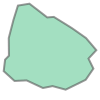

In [26]:
to_plot['geometry'].iloc[0]

In [30]:
gv.Polygons(world)

:Polygons   [Longitude,Latitude]

In [32]:
to_plot.head()

country_name country_code                       indicator_name  \
0      Uruguay          URY  Primary education, duration (years)   
2         Iraq          IRQ  Primary education, duration (years)   
6   Kazakhstan          KAZ  Primary education, duration (years)   
7  Timor-Leste          TLS  Primary education, duration (years)   
8   Mozambique          MOZ  Primary education, duration (years)   

  indicator_code  year  value iso_a3  \
0    SE.PRM.DURS  1989    6.0    URY   
2    SE.PRM.DURS  1984    6.0    IRQ   
6    SE.PRM.DURS  2004    4.0    KAZ   
7    SE.PRM.DURS  2002    6.0    TLS   
8    SE.PRM.DURS  2016    7.0    MOZ   

                                            geometry      continent  
0  POLYGON ((-57.62513342958296 -30.2162948544542...  South America  
2  POLYGON ((45.42061811705321 35.97754588474282,...           Asia  
6  POLYGON ((70.96231489449929 42.26615428320554,...           Asia  
7  POLYGON ((124.9686824891162 -8.892790215697083...           Asia  
8  POLYGON ((34.55998904799935 -11.52002003341592...         Africa

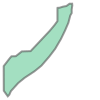

In [34]:
to_plot['geometry'].iloc[10]

In [18]:
to_plot = to_plot.merge(world[['iso_a3', 'geometry', 'continent']], left_on='country_code', right_on='iso_a3', how='left')
to_plot.head()

country_name country_code  \
0                         Uruguay          URY   
1  St. Vincent and the Grenadines          VCT   
2                            Iraq          IRQ   
3                       St. Lucia          LCA   
4                      San Marino          SMR   

                        indicator_name indicator_code  year  value iso_a3  \
0  Primary education, duration (years)    SE.PRM.DURS  1989    6.0    URY   
1  Primary education, duration (years)    SE.PRM.DURS  1975    7.0    NaN   
2  Primary education, duration (years)    SE.PRM.DURS  1984    6.0    IRQ   
3  Primary education, duration (years)    SE.PRM.DURS  1977    7.0    NaN   
4  Primary education, duration (years)    SE.PRM.DURS  1987    5.0    NaN   

                                            geometry      continent  
0  POLYGON ((-57.62513342958296 -30.2162948544542...  South America  
1                                                NaN            NaN  
2  POLYGON ((45.42061811705321 35.97754588474282,...           Asia  
3                                                NaN            NaN  
4                                                NaN            NaN

In [68]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [73]:
import geopandas

geodata = geopandas.GeoDataFrame(to_plot.query('year == 2010'))

In [79]:
gv.Polygons(geodata, vdims=['value']).opts(tools=['hover'], width=800, height=550)

:Polygons   [Longitude,Latitude]   (value)

In [45]:
try_ = to_plot[['value', 'country_name', 'country_code', 'geometry']]
try_.isna().sum()

value           0
country_name    0
country_code    0
geometry        0
dtype: int64

In [41]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [40]:
p = gv.Polygons(world)
p

:Polygons   [Longitude,Latitude]

In [42]:
try_.columns

Index(['value', 'geometry'], dtype='object')

In [43]:
try_.dtypes

value       float64
geometry     object
dtype: object

In [44]:
world.dtypes

pop_est       float64
continent      object
name           object
iso_a3         object
gdp_md_est    float64
geometry       object
dtype: object

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
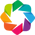

In [52]:
import holoviews as hv
hv.extension('bokeh', 'matplotlib')

In [53]:
polys = gv.Polygons(world, vdims=['gdp_md_est', 'continent', 'name'])
polys.opts(width=600, height=500, tools=['hover'], backend='bokeh', cmap='viridis', ylim=(-60, 90))

:Polygons   [Longitude,Latitude]   (gdp_md_est,continent,name)

In [56]:
try_.columns = ['value', 'name', 'iso_a3', 'geometry']

In [60]:
try_.iloc[10]

value                                                       6
name                                                  Somalia
iso_a3                                                    SOM
geometry    POLYGON ((49.72862 11.5789, 50.25878000000001 ...
Name: 18, dtype: object

In [66]:
try_.iloc[:2]

value     name iso_a3                                           geometry
0    6.0  Uruguay    URY  POLYGON ((-57.62513342958296 -30.2162948544542...
2    6.0     Iraq    IRQ  POLYGON ((45.42061811705321 35.97754588474282,...

In [67]:
gv.Polygons(try_.iloc[:2], vdims=['value'])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

:Polygons   [name,iso_a3]   (value)

In [55]:
world.head()

pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  
3  POLYGON ((51.57951867046327 24.24549713795111,...  
4  (POLYGON ((-65.50000000000003 -55.199999999999...

In [49]:
gv.Polygons(try_, vdims=['country_code', 'country_name', 'value'])

ValueError: kdims: list length must be between 2 and 2 (inclusive)

In [36]:
px.scatter(to_plot, x='year', y='value', color='continent')

In [ ]:
import geoviews as gv
import geoviews.feature as gf
gdata = gv.Dataset(to_plot, kdims=['country_code', 'year'], vdims=['value'])
gdata.to(gv.Polygons) * gf.coastline

In [ ]:
gdata

In [ ]:
subset.head()

In [ ]:
import plotly_express as px
subset.head()

In [ ]:


# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here